In [1]:
import pandas as pd
import numpy as np
from random import randint
import random
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from numpy.linalg import eig
import math

Matplotlib is building the font cache using fc-list. This may take a moment.


In [13]:
random.seed(112)
rn = random.sample(range(1,200),100)

'''Create a dataframe''' 

df = pd.DataFrame(rn,columns=['a'])

In [9]:
# Multicollinear Data:
df_m = df.merge(df.a.apply(lambda s: pd.Series({'b': randint(0, 34),'c': randint(0, 50), 'd': s-2, 'e': 2*s, 'f': randint(0,20), 'g':s*4})), left_index=True, right_index=True)
#Non- Multicollinear Data:
df_nonm = df.merge(df.a.apply(lambda s: pd.Series({'b': randint(0, 50),'c': randint(0, 40), 'd': randint(0,100), 'e': randint(0,35), 'f': randint(0,120), 'g':randint(0,75)})), left_index=True, right_index=True)

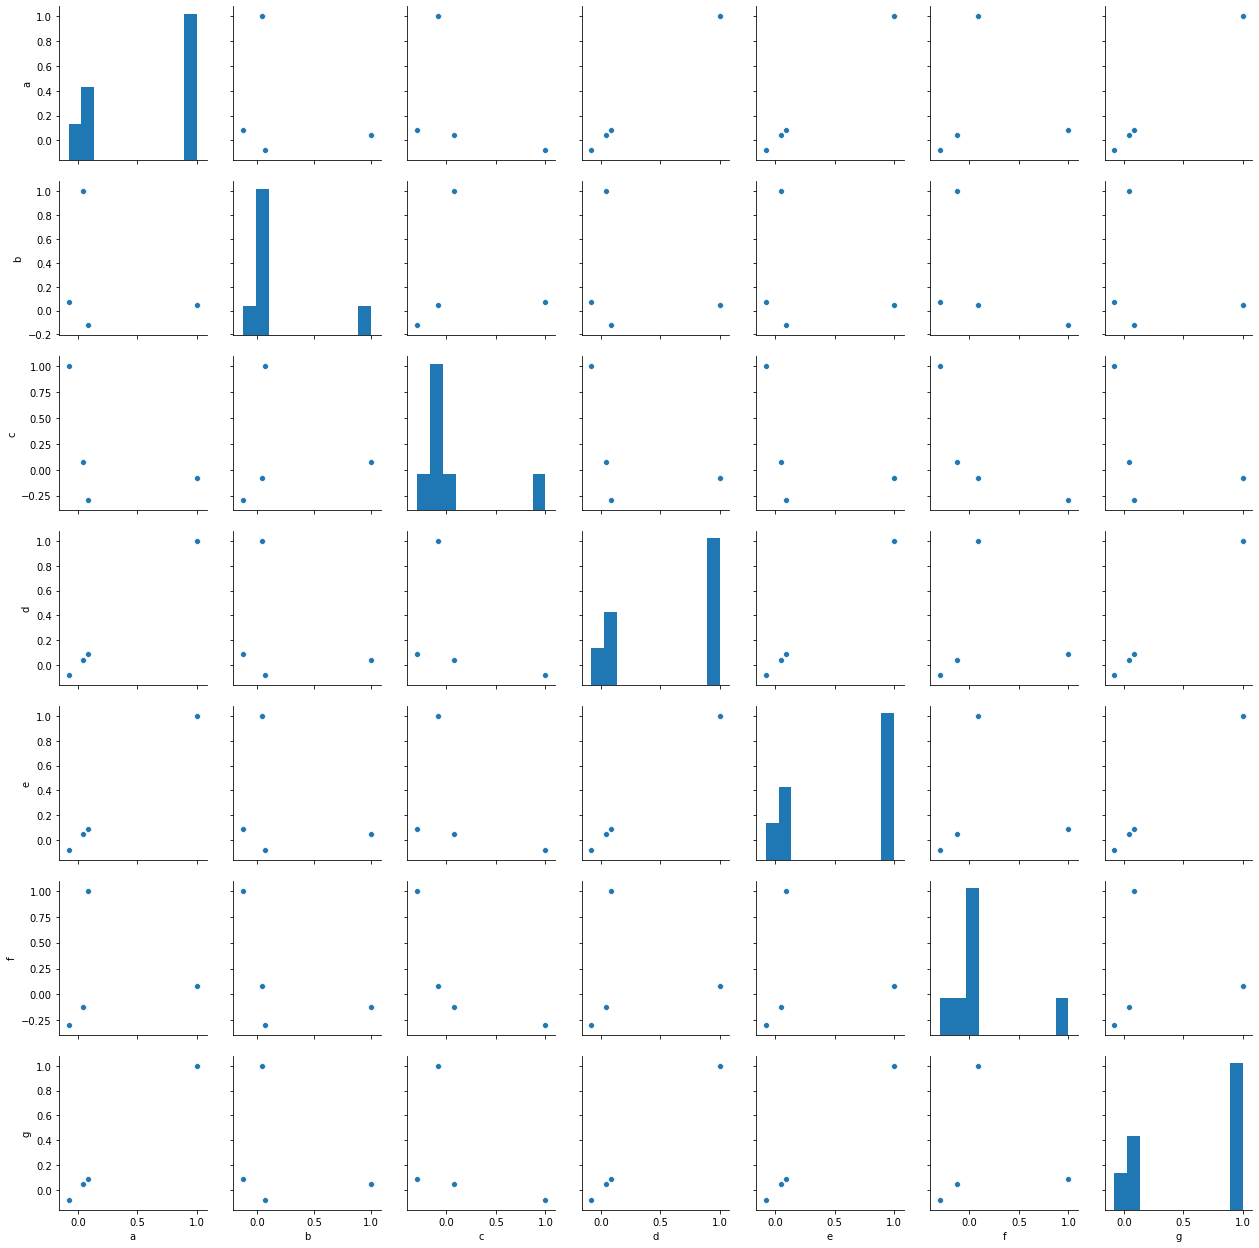

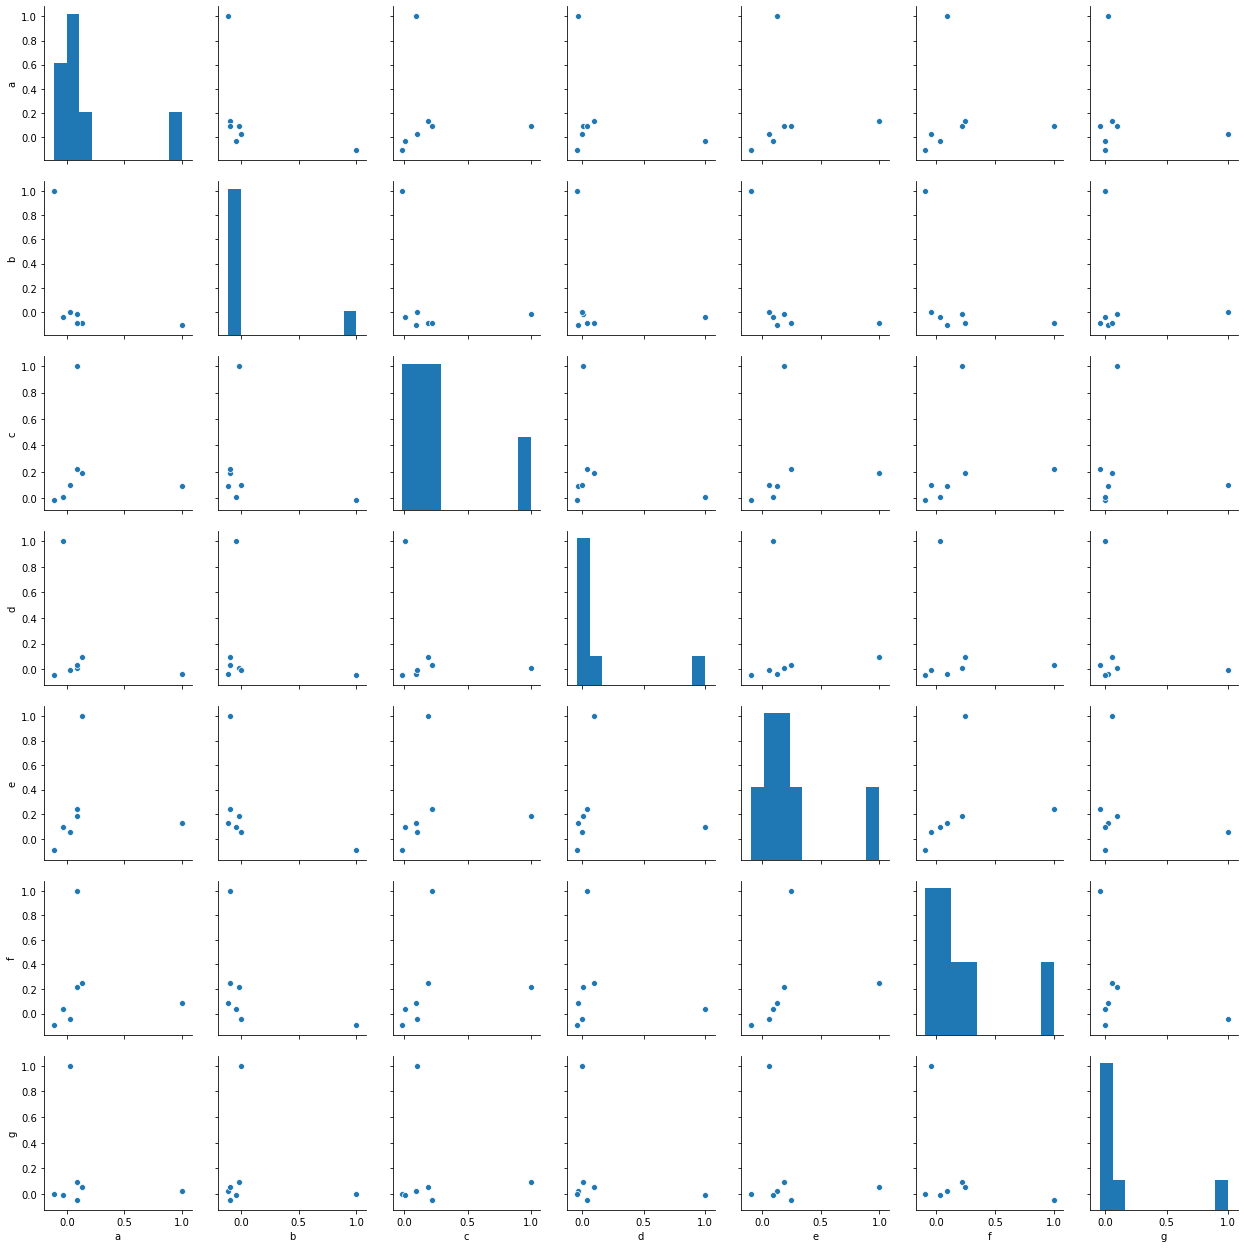

In [12]:
'''Correlation Matrix for Multicollinear data and non- 
Multicollinear data before applying PCA'''
corr_m = df_m.corr()
sns.pairplot(corr_m)
corr_nonm = df_nonm.corr()
sns.pairplot(corr_nonm)

## Scaling Data & PCA :

In [18]:
# Use StandardScaler() to standardize the features making it in unit scale (mean = 0 and variance = 1)before applying PCA

df_m_scaler = StandardScaler().fit_transform(df_m)
df_nonm_scaler = StandardScaler().fit_transform(df_nonm)
''' Principal Component Analysis(taking Principal Components = 4) for both Multicollinear data and non-Multicollinear data '''

#Multicollinearity data -
pca_m = PCA(n_components=4)
principalcomponents_m = pca_m.fit_transform(df_m_scaler)
principaldf_m = pd.DataFrame(data = principalcomponents_m,columns=['p1','p2','p3','p4'])
#nonmulticollinearity data -
pca_nonm = PCA(n_components=4)
principalcomponents_nonm = pca_nonm.fit_transform(df_nonm_scaler)
principaldf_nonm = pd.DataFrame(principalcomponents_nonm,columns=['p1','p2','p3','p4'])

## Correlation Matrix of PCA objects-

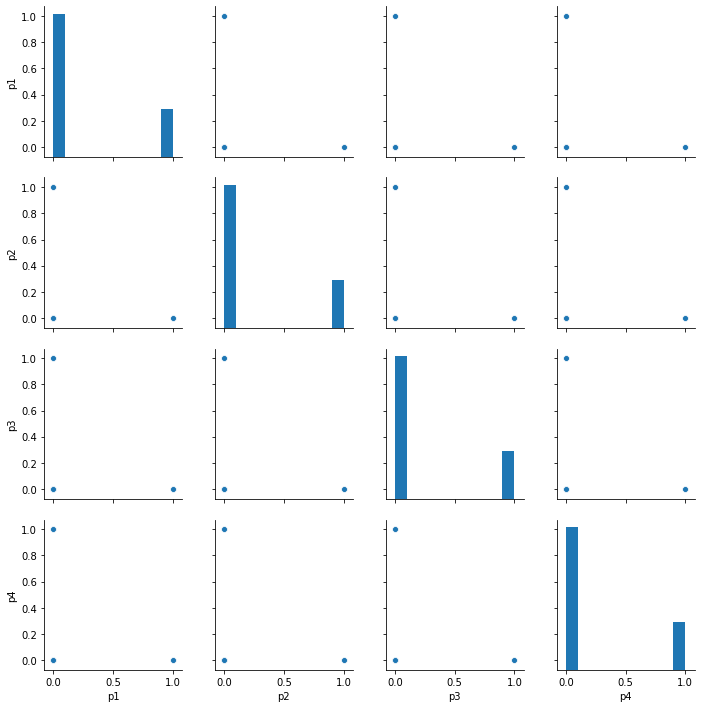

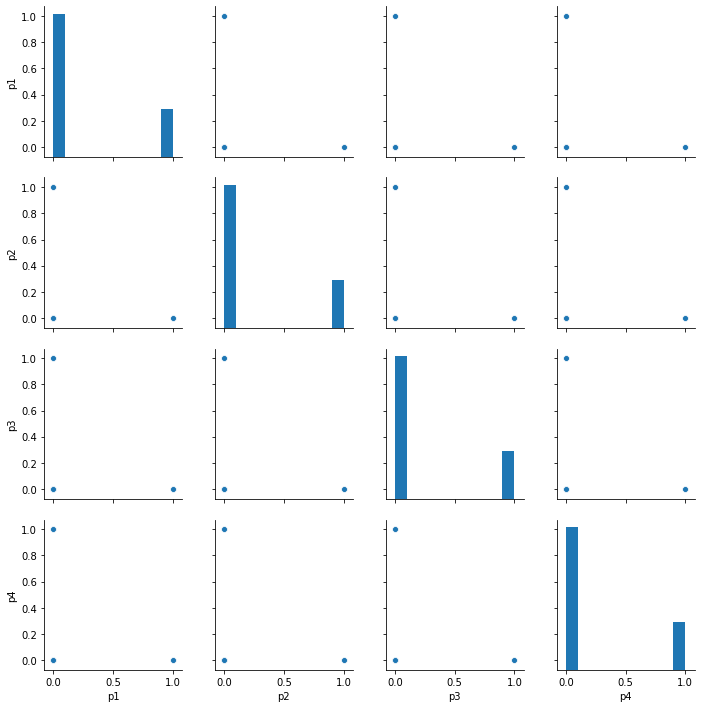

In [19]:
''' Correlation Matrix for Multicollinear data and non- Multicollinear data after applying PCA''' 
#multicollinearity data -

corr_m_pca = principaldf_m.corr()
sns.pairplot(corr_m_pca)
corr_nonm_pca = principaldf_nonm.corr()
sns.pairplot(corr_nonm_pca)


# PCA for speed_dating

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

%matplotlib inline
%config inlineBackend.figure_format = 'ratina'

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

### Loading the data and perform cleaning

In [8]:
sd = pd.read_csv("/Users/macbook/Documents/Data_Science/ML_DL/Data_Sets/speed-dating_csv.csv")

In [11]:
sd.describe()

,has_null,wave,age,age_o,d_age,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,...,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met,decision,decision_o,match
count,8378.00000,8378.000000,8283.000000,8274.000000,8378.000000,8378.000000,8299.000000,8299.000000,8289.000000,8289.000000,...,8220.000000,8277.000000,1800.000000,7205.000000,8138.000000,8069.000000,8003.000000,8378.000000,8378.000000,8378.000000
mean,0.87491,11.350919,26.358928,26.364999,4.185605,0.395799,3.784793,3.651645,22.495347,17.396867,...,0.196010,5.534131,5.570556,3.207814,6.134087,5.207523,0.049856,0.419909,0.419551,0.164717
std,0.33084,5.995903,3.566763,3.563648,4.596171,0.489051,2.845708,2.805237,12.569802,7.044003,...,0.303539,1.734059,4.762569,2.444813,1.841285,2.129565,0.282168,0.493573,0.493515,0.370947
min,0.00000,1.000000,18.000000,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,-0.830000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.00000,7.000000,24.000000,24.000000,1.000000,0.000000,1.000000,1.000000,15.000000,15.000000,...,-0.020000,5.000000,2.000000,2.000000,5.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,1.00000,11.000000,26.000000,26.000000,3.000000,0.000000,3.000000,3.000000,20.000000,18.370000,...,0.210000,6.000000,4.000000,3.000000,6.000000,5.000000,0.000000,0.000000,0.000000,0.000000
75%,1.00000,15.000000,28.000000,28.000000,5.000000,1.000000,6.000000,6.000000,25.000000,20.000000,...,0.430000,7.000000,8.000000,4.000000,7.000000,7.000000,0.000000,1.000000,1.000000,0.000000
max,1.00000,21.000000,55.000000,55.000000,37.000000,1.000000,10.000000,10.000000,100.000000,60.000000,...,0.910000,10.000000,20.000000,18.000000,10.000000,10.000000,8.000000,1.000000,1.000000,1.000000


In [13]:
sd.isnull().sum()

has_null                              0
wave                                  0
gender                                0
age                                  95
age_o                               104
d_age                                 0
d_d_age                               0
race                                 63
race_o                               73
samerace                              0
importance_same_race                 79
importance_same_religion             79
d_importance_same_race                0
d_importance_same_religion            0
field                                63
pref_o_attractive                    89
pref_o_sincere                       89
pref_o_intelligence                  89
pref_o_funny                         98
pref_o_ambitious                    107
pref_o_shared_interests             129
d_pref_o_attractive                   0
d_pref_o_sincere                      0
d_pref_o_intelligence                 0
d_pref_o_funny                        0
